**PROJECT OVERVIEW**
1. Building a model to predict building damage from the Nepal 2015 Earthquake using data from Open Data Nepal. Data primarily from the Gorkha district.
2. Key Learning Objectives of Project:
    * Getting data by querying a SQL database
    * Building a **logistic regression** model for classification
    * Building a **decision tree** model for classification
    * Incorporating ethical considerations into model building

**Section Overview**
* Connecting to a SQLITE server
* Exploring the database, creating dataset
* Importing database query into DataFrame

* MACHINE LEARNING WORKFLOW:
    * Preparing Data
        * **Connecting** to SQLITE server
        * **Exploring**
            * Data Model for a SQL Database
            * Structured Data
            * Querying a database using SQLITE
        * **Importing** query results into a DataFrame

In [1]:
# Importing necessary libraries

import sqlite3 # To get data from SQL database
import pandas as pd

# 1. Preparing Data
## 1.1 Connecting
* SQLITE database is serverless and sort of halfway between a server and a file
* **Magic functions**
    * They allow adding extensions to notebook
    * Start with a `%`
    * No comments can be written inside magic commands
    * Some commonly used magic functions are below:

| Magic Command | Description of Command | 
| --- | --- | 
| `%pwd` | Print the current working directory |
| `%cd` | Change the current working directory |
| `%ls` | List the contents of the current directory |
| `%history` | Show the history of the In [ ]: commands |
* **ipython-sql**
    * It allows writing SQL code directly in a Jupyter Notebook
    * The `%sql` (or `%%sql`) magic command is added to the beginning of a code block and then SQL code can be written.
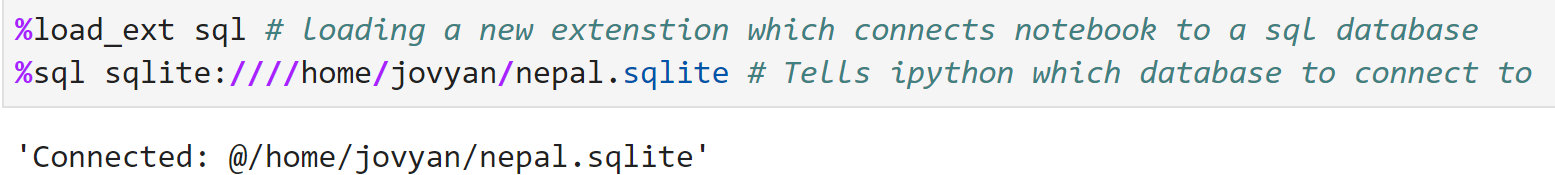

## 1.2 Exploring Data
### Data Schema
* `SELECT *` gets all the columns in the SQL database
* 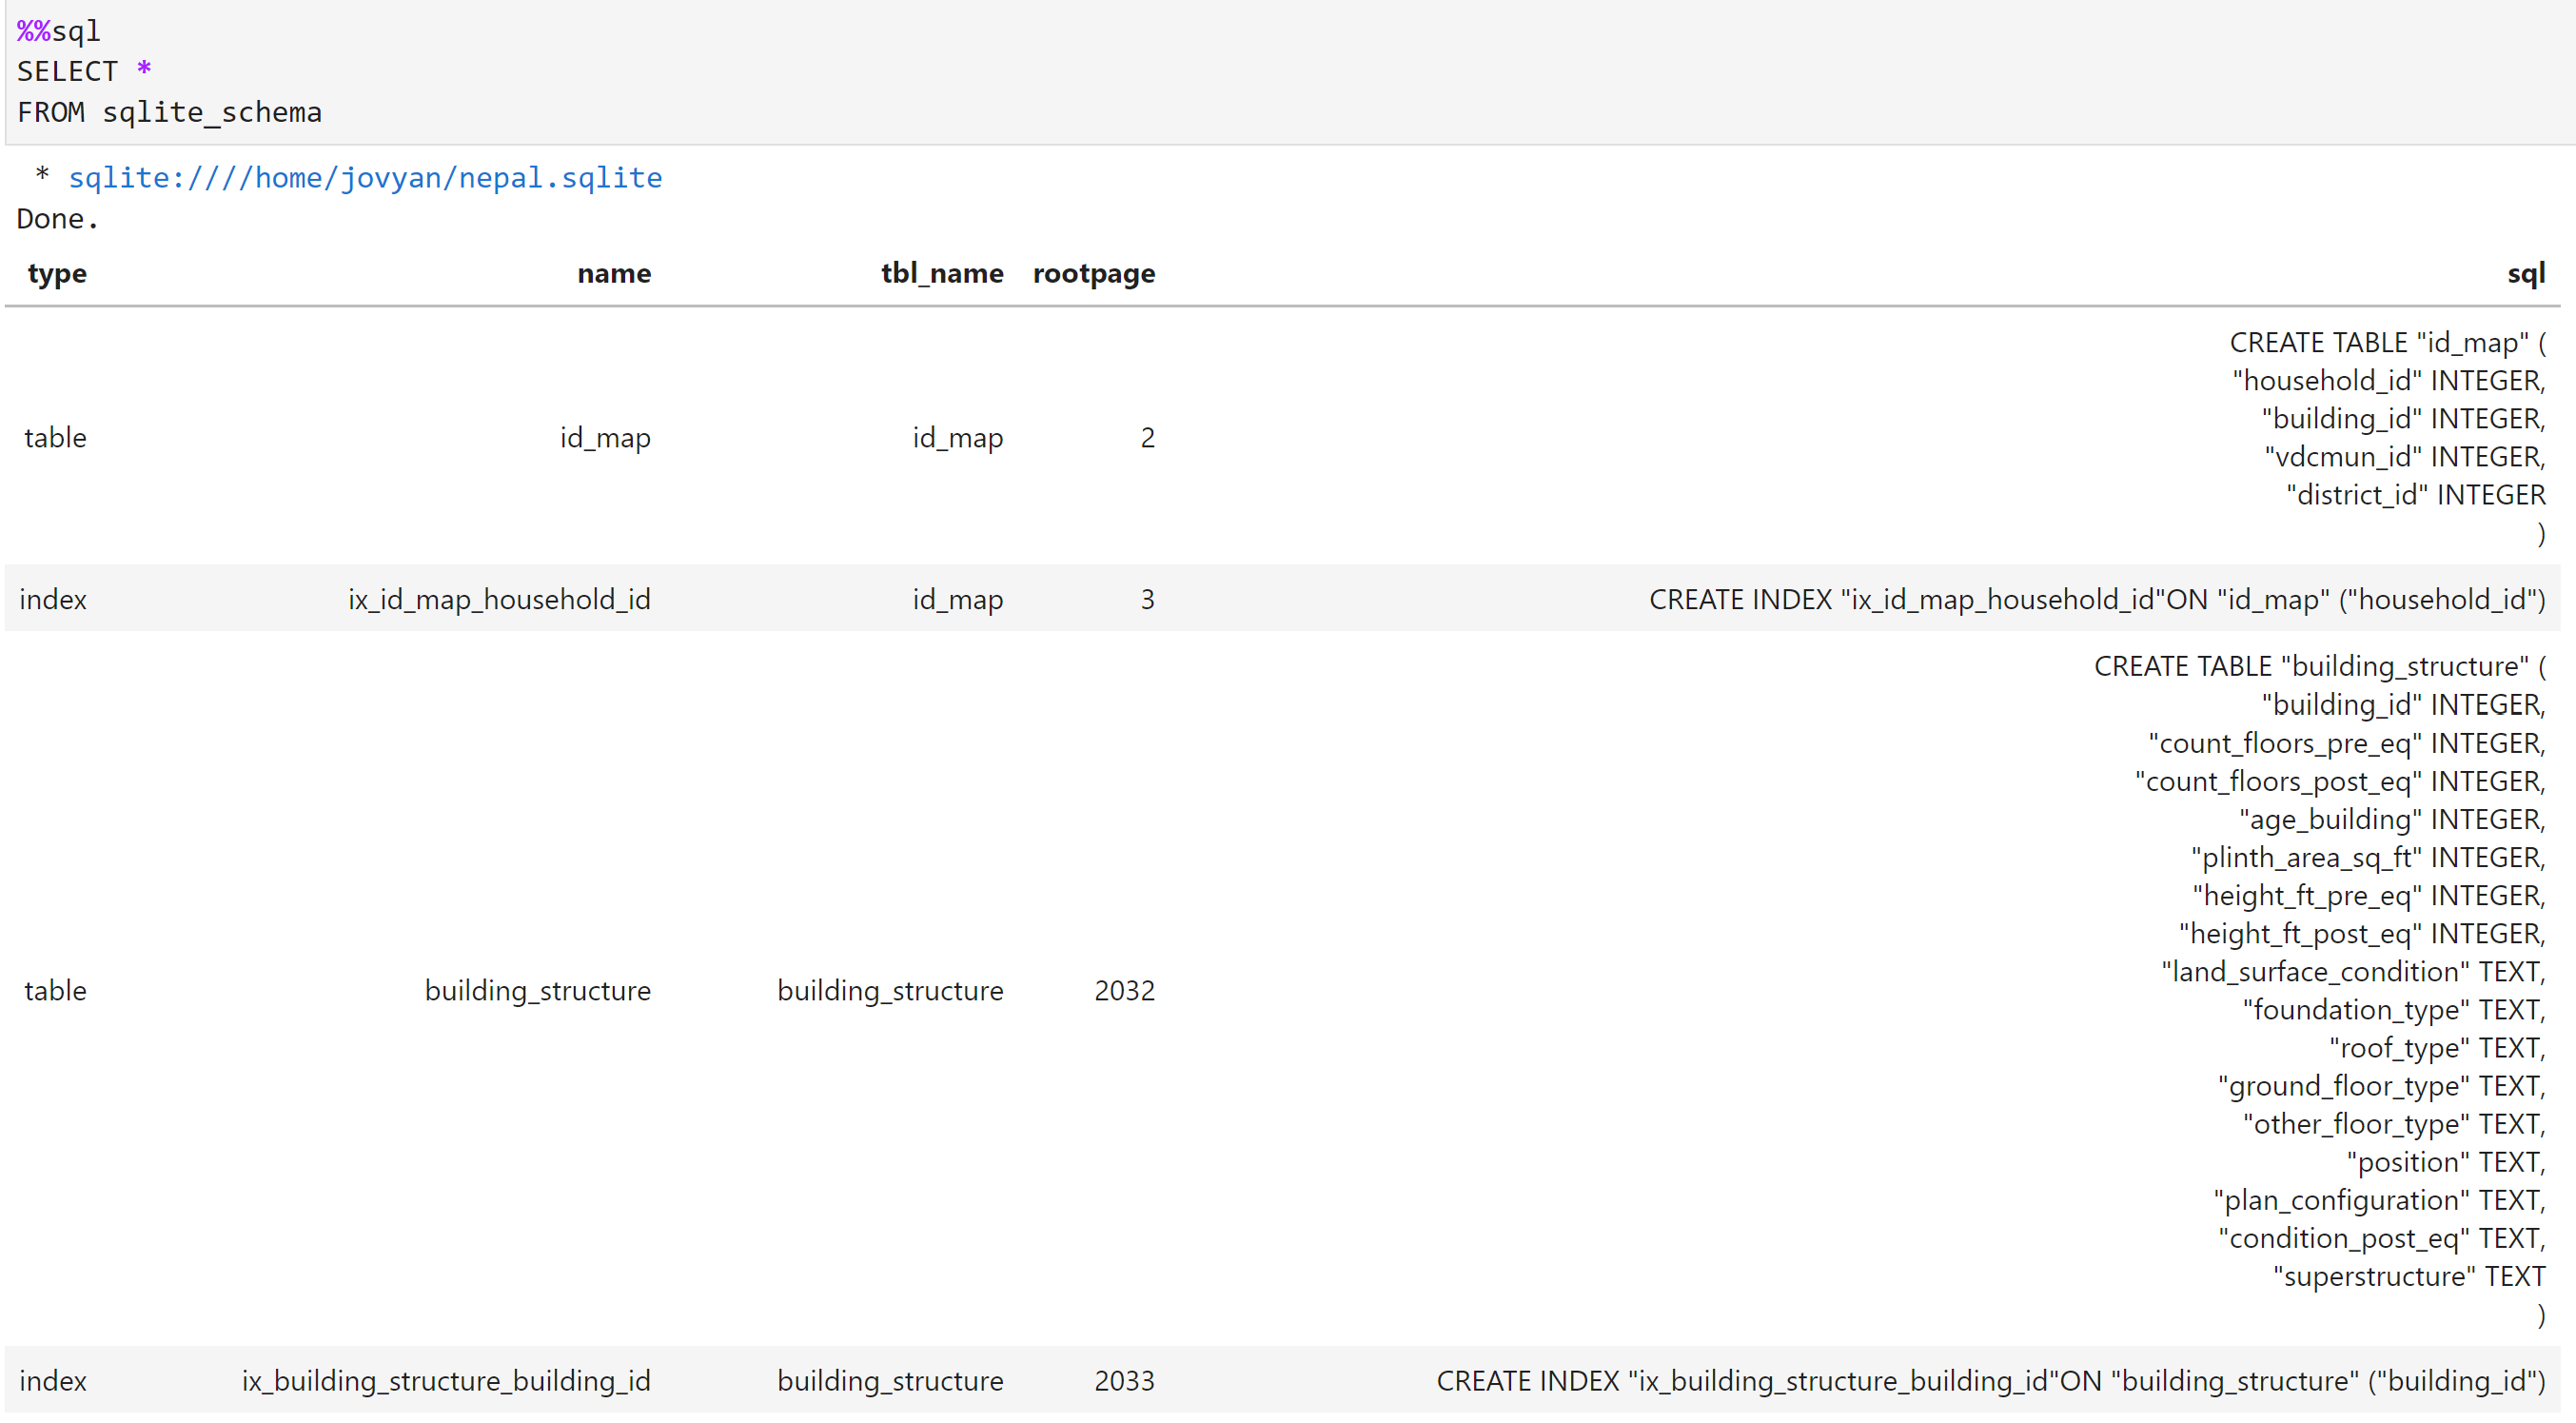
* 1st column is `type`. It displays tables which are part of the database
* 2nd column is `name` which are names of the tables
* 5th column is `sql` which displays different columns which exist in a particular table

### Table Names
* Selecting the `name` column from the `sqlite_schema` table, showing only rows where the **`type`** is `"table"`.
* 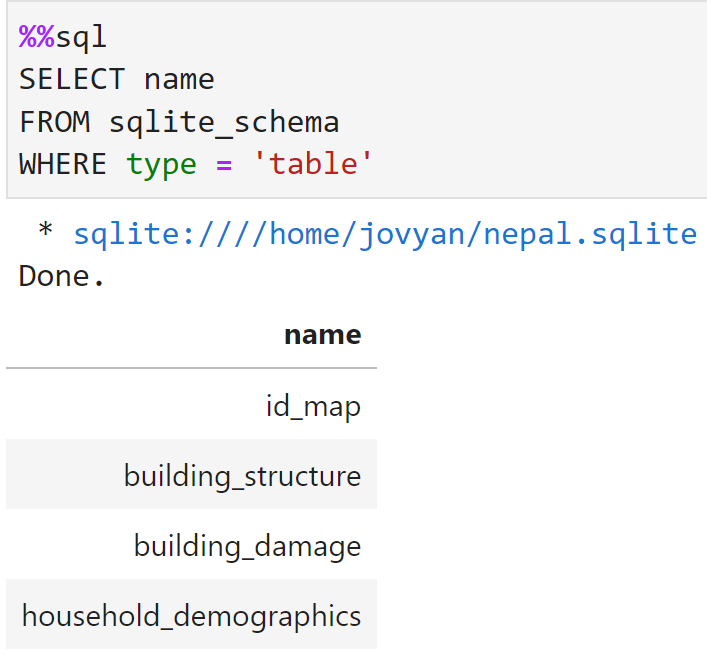

### LIMIT Clause
* Selecting all columns from the id_map table and limiting results to the first five rows
* 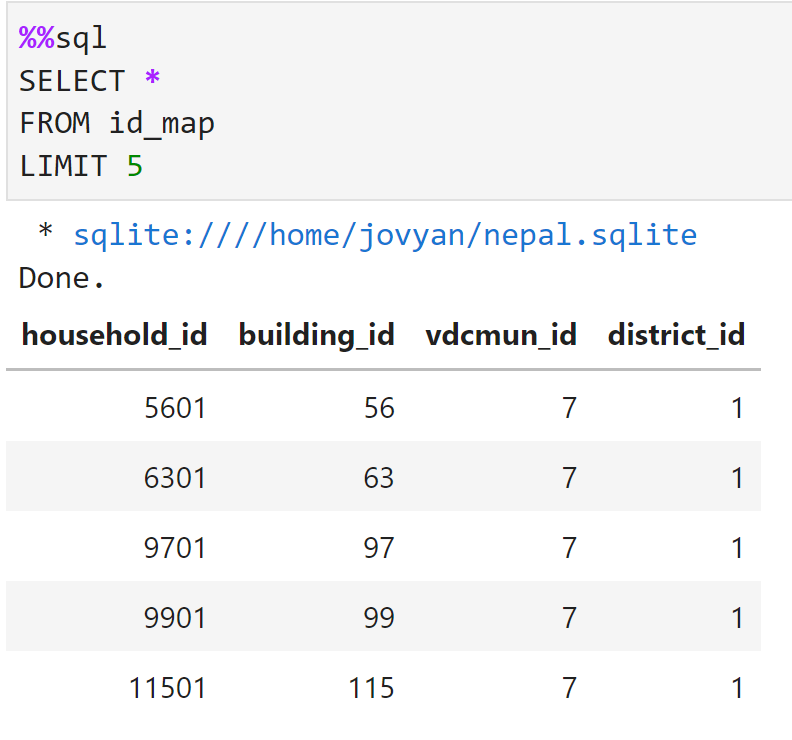
* A Data-Dictionary is a summary of features which are stored in a database
    * More information on tables can be found in it
    * A good way to make sense of what is going on the database

### Count Command
* Using `count` to find the number of observations in the `id_map` table
* 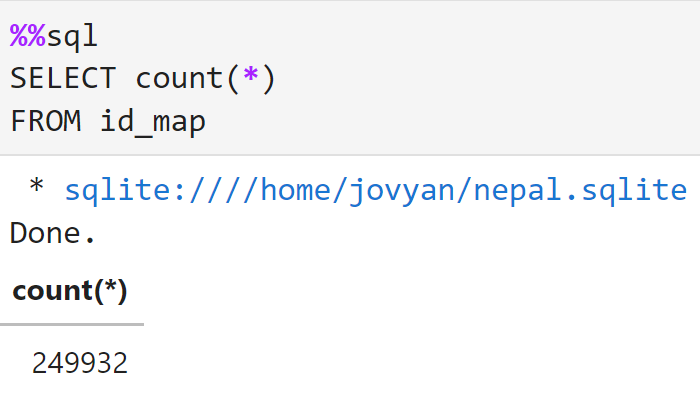

### Distinct Command
* Using the `distinct` command to determine the unique values in the `district_id` column
* 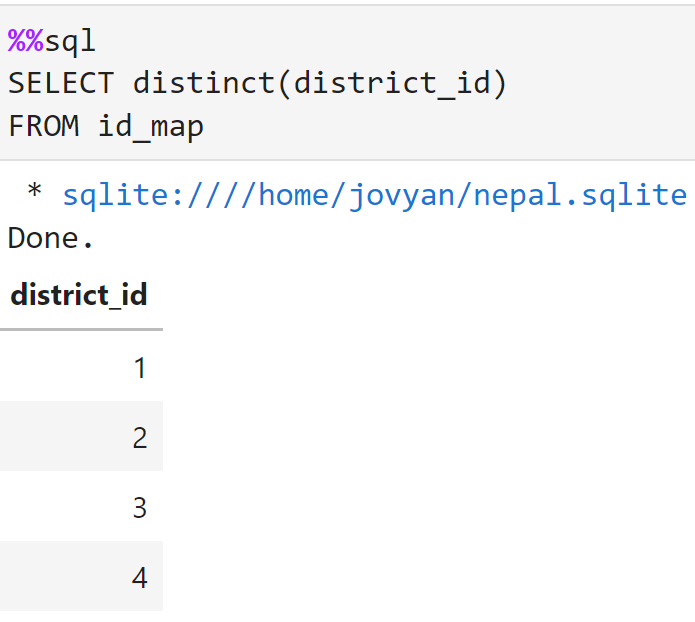

### Counting Distinct Building IDs
* Combining the `count` and `distinct` commands to calculate the number of unique values in **`building_id`**
* 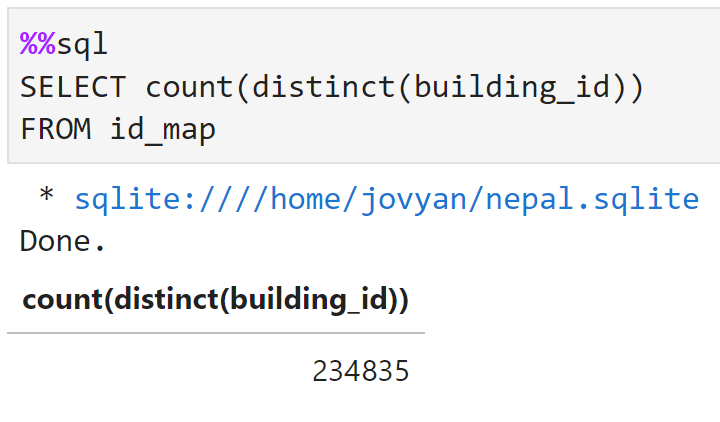
* **We are getting a sense by querying this dataset that there are around 250k households, living in around 230k buildings in 4 districts**

### Gorkha Subset
*  Selecting all columns from `id_map`, showing only rows where the **`district_id`** is `4` (Gorkha district) and limiting results to the first five rows
* 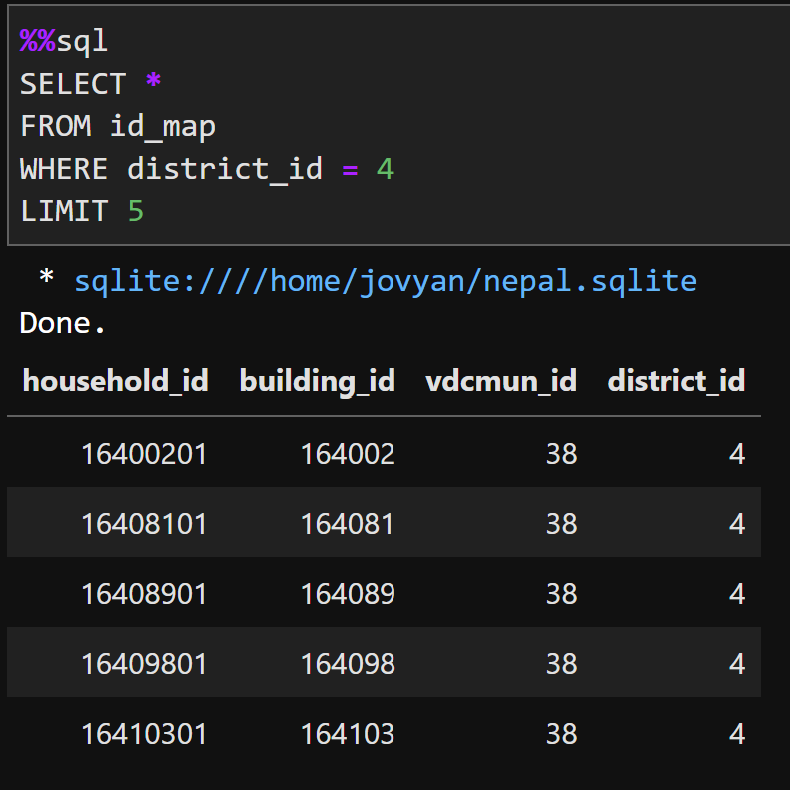

### Gorkha Counting Households
* Using the `count` and `WHERE` commands together to calculate number of Gorkha observations in `id_map` table
* 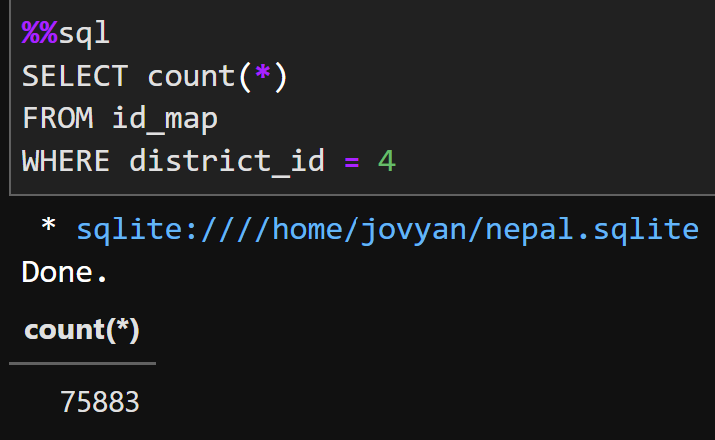
* It turns out that there are almost 75k households from Gorkha district

### Gorkha Counting Buildings
* Combining the `count` and `distinct` commands to calculate the number of unique values in **`building_id`**, considering only rows where the **`district_id`** is `4`
* 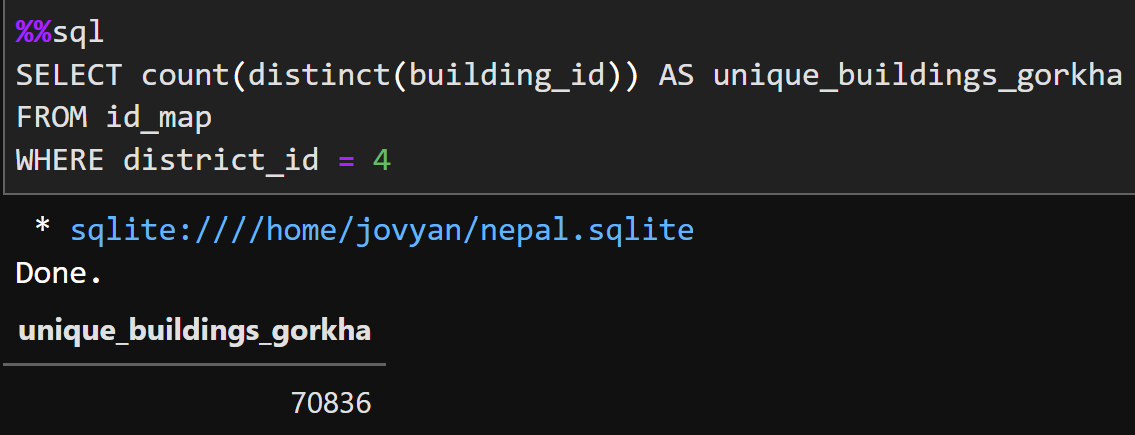
* `AS` is an alias can be used to make the code more compact and/or to make outputs human readable

### Inspecting Building_structure Table
* Selecting all the columns from the `building_structure` table, and limiting results to the first five rows
* 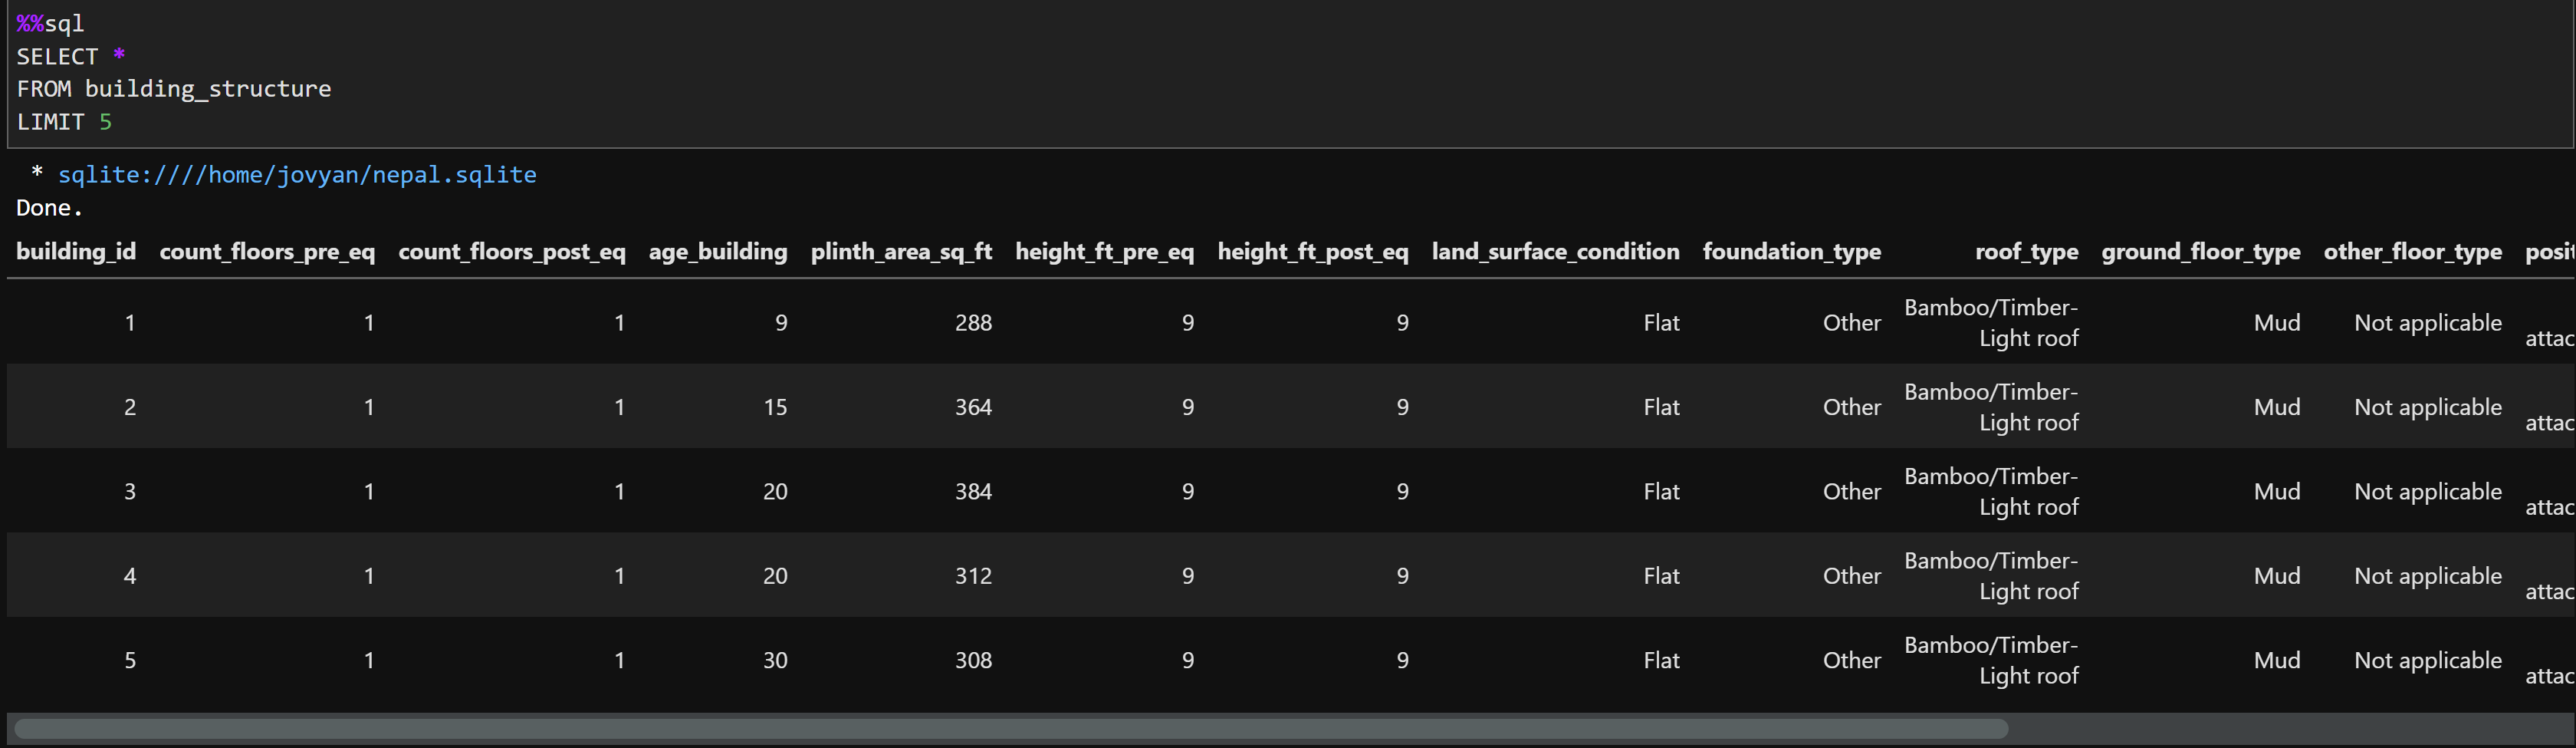
* A column `building_id` in this table has the same name as another column in the `id_map` table
* Each row corresponds to a building in this table, whereas in `id_map` table each row represented a household
* There can be seen interesting characteristics about the building
* This is the table which would help build a model on which buildings are likely to suffer in case of an earthquake event

### Building_structure Count
* Using `count` to find out number of buildings in the `building_structure` table
* 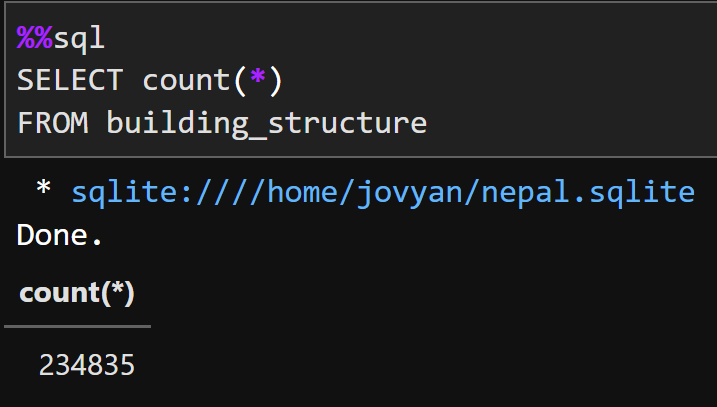
* It can be seen that there are 234k buildings in this table.
* It is helpful because it is also known that there are 234k unique building id in `id_map` table

### JOIN Tables (LEFT JOIN)
* Using the `JOIN` command to join the `id_map` and `building_structure` tables, showing only buildings where **`district_id`** is `4` (Gorkha District) and limiting results to the first five rows of the new table
* Look for a common column in two tables to proceed with `JOIN`. Here the common column is `building_id`
* It turns out that `id_map` (250k) and `building_structure` (234k) have different sizes
    * A `LEFT JOIN` is most optimal here with id_map on left
    * some entries in the building_id would be repeated
    * To avoid verbosity alias `id_map` as `i` and `building_structure` as `s`
* 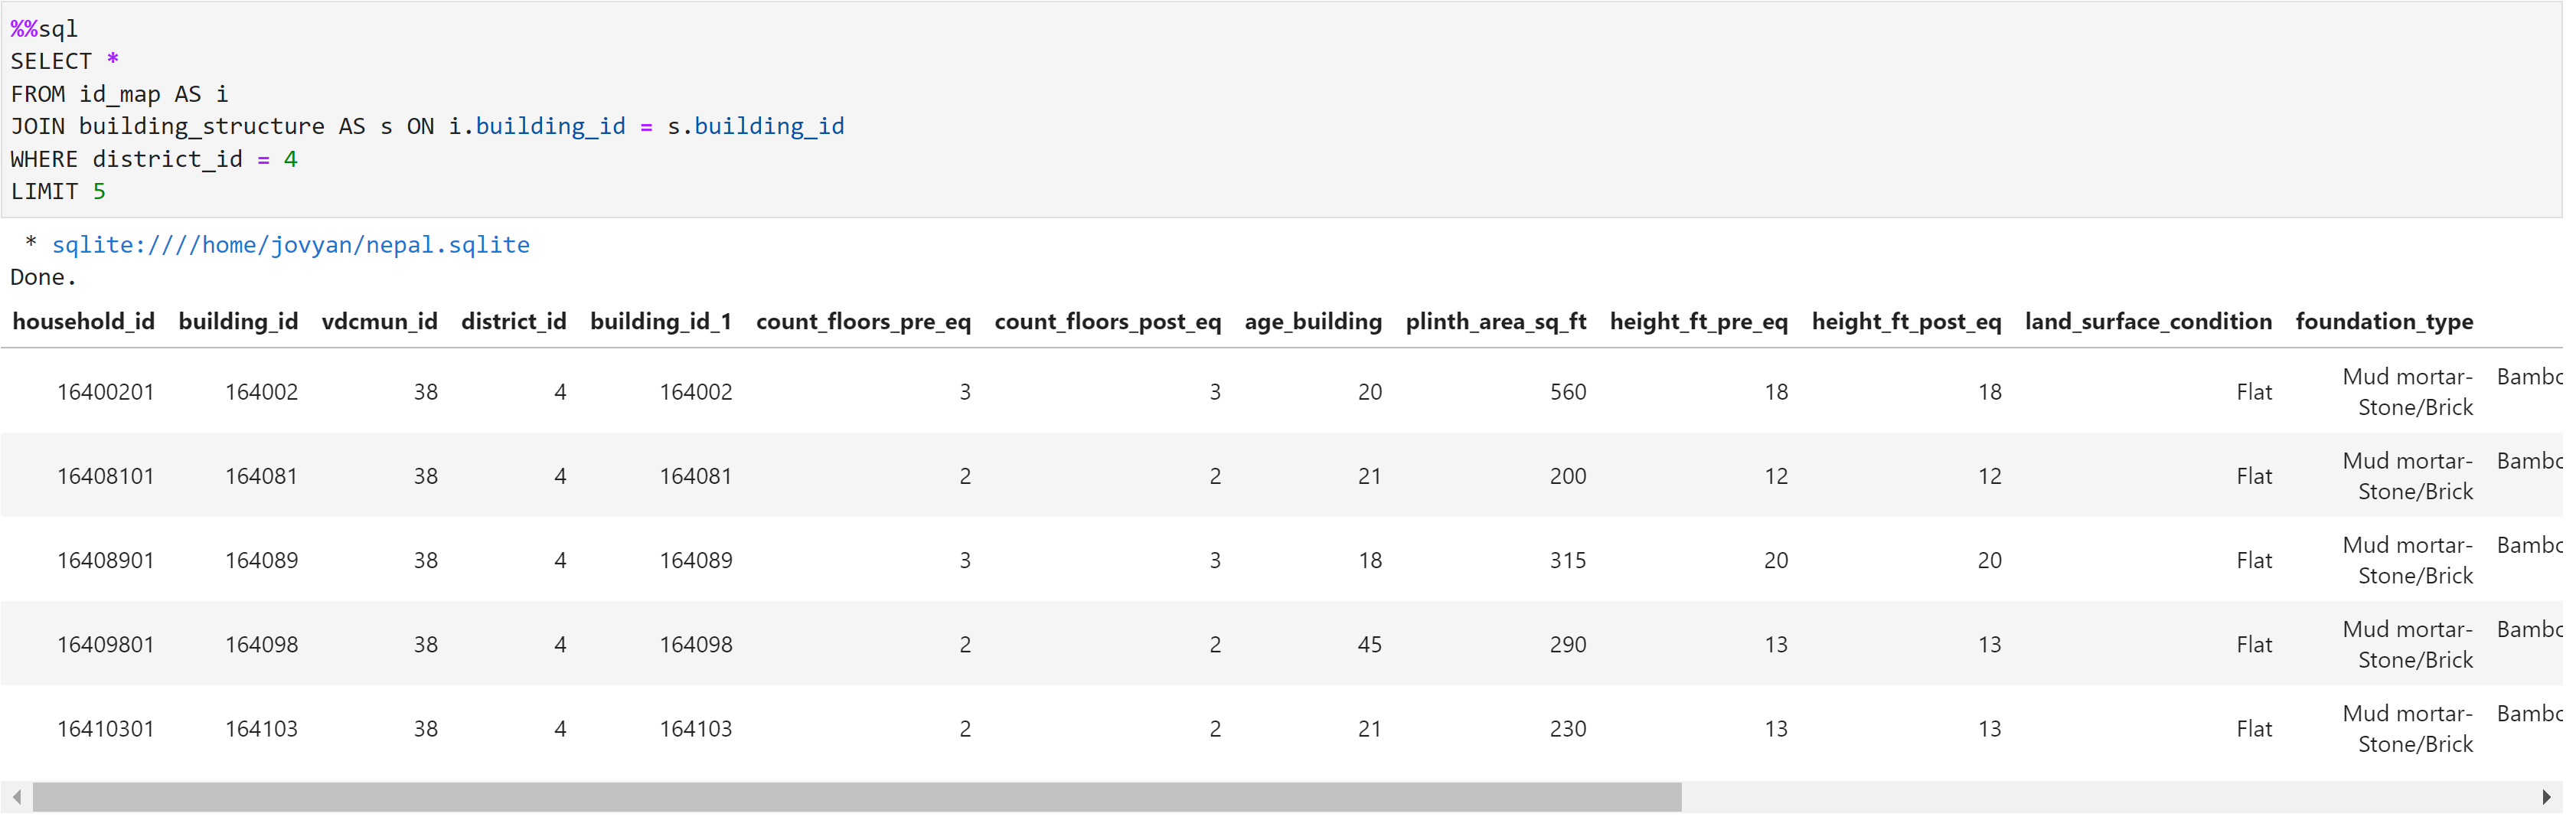
* As can be seen that on the left there are columns from id_map table

### JOIN Distinct Buildings
* The table formed by joining above has number of households in Gorkha district
* But we need unique buildings in Gorkha district
* We need to join on distinct values of `building_id`
* all columns except `building_id` can be eliminated from `id_map` table because we do not need them
* 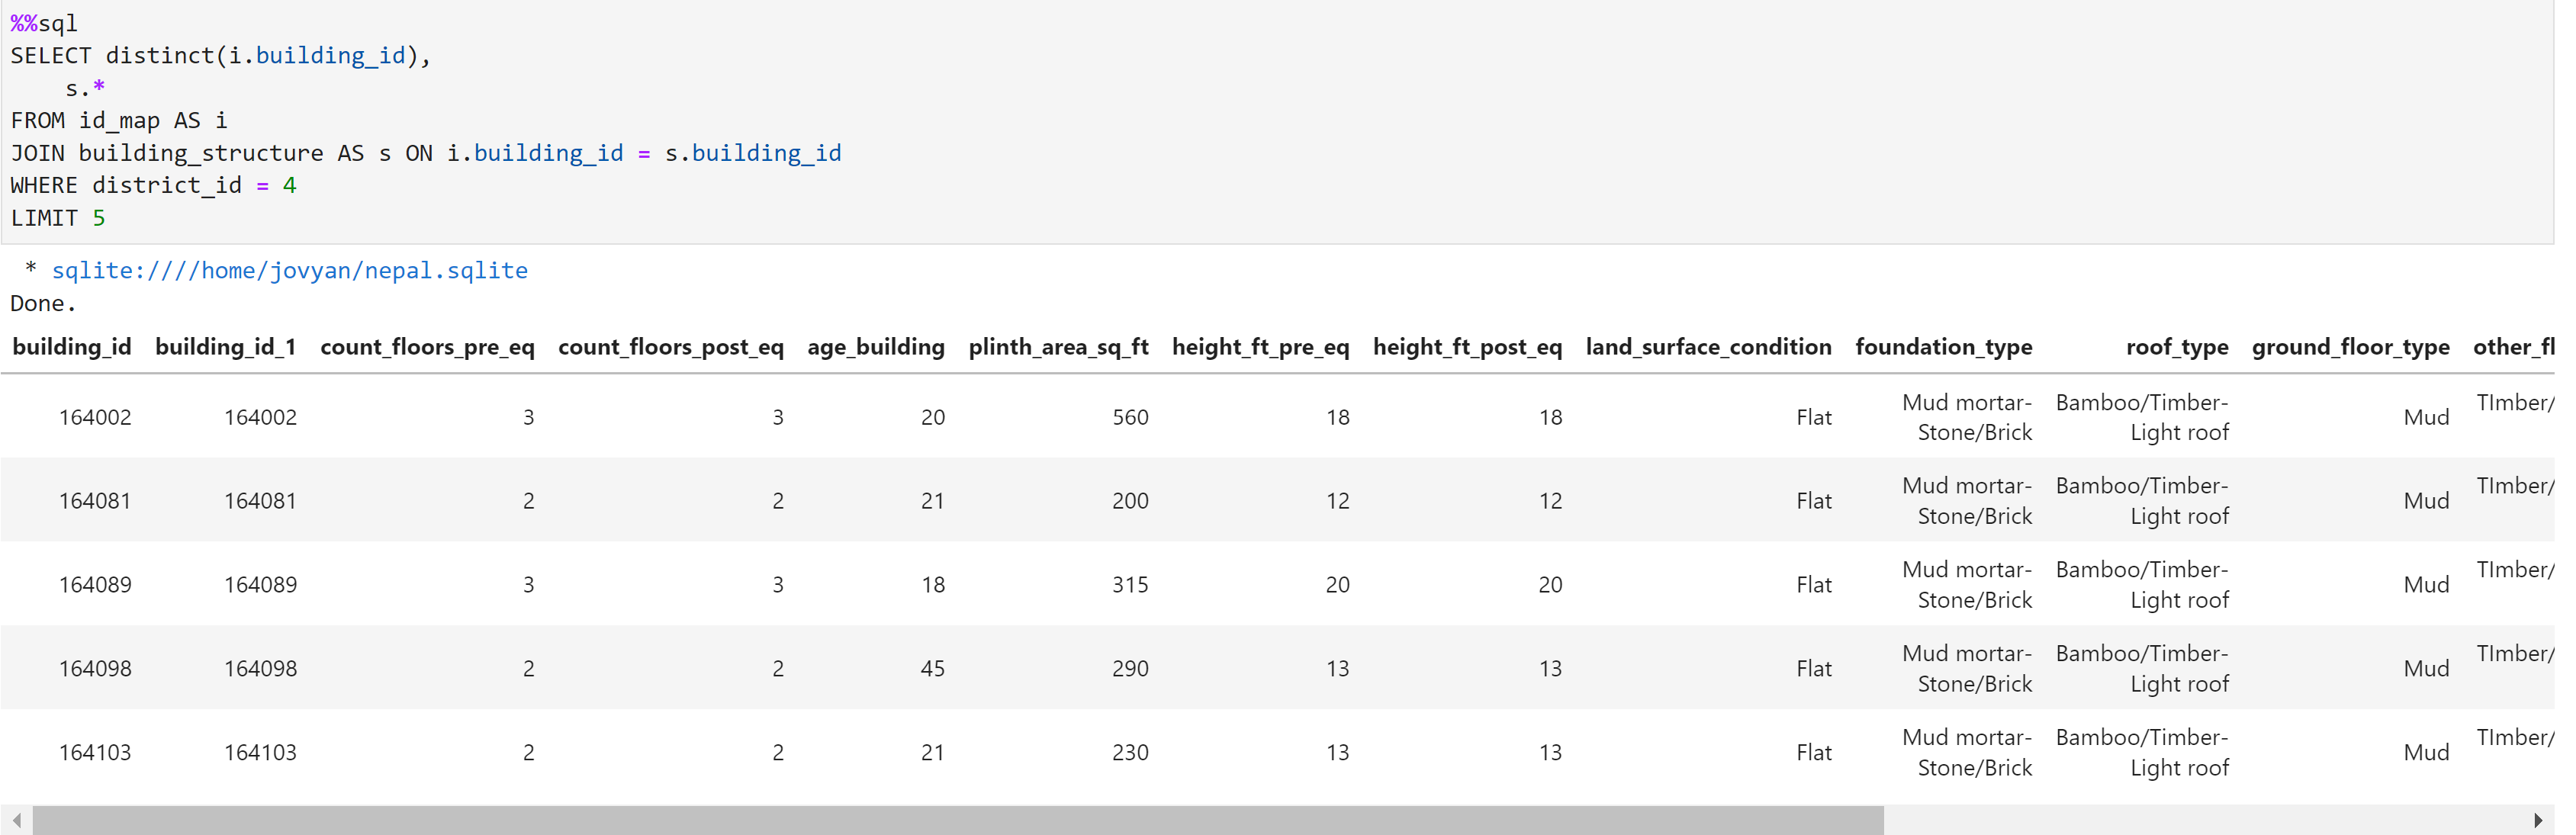

### Triple JOIN
* The damage to each building sustained in the earthquake is in the `building_damage` table
* 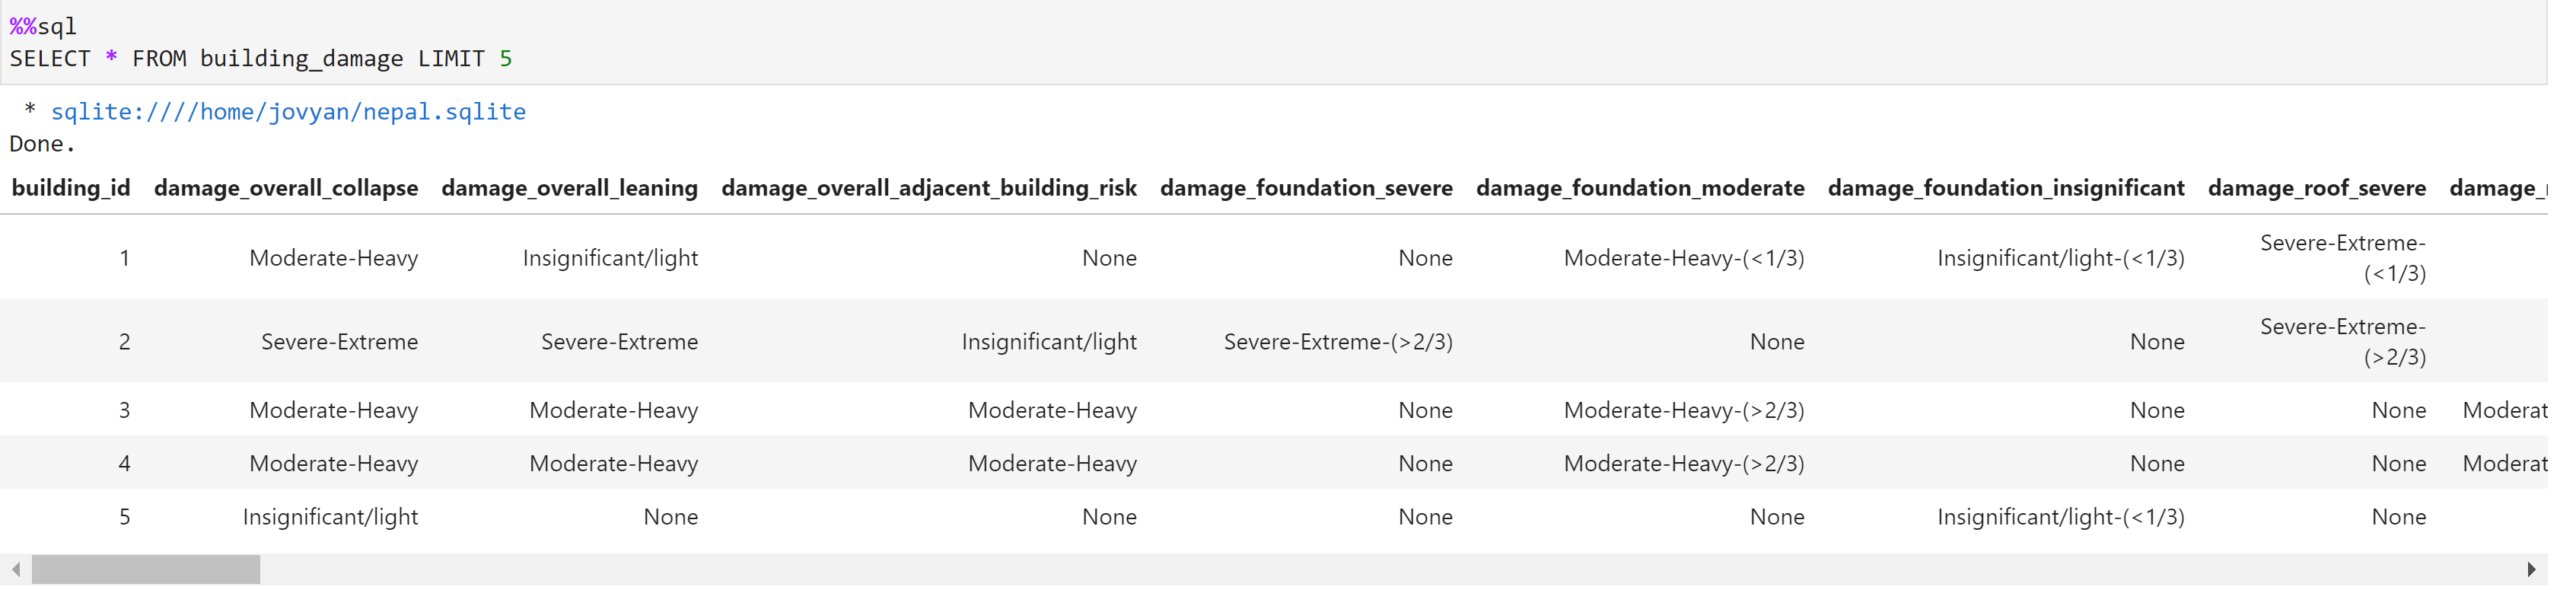
* `building_damage` table also has a `building_id` column, which can be used to make a triple join.
* The only column of interest in this table is `damage_grade` for model
* 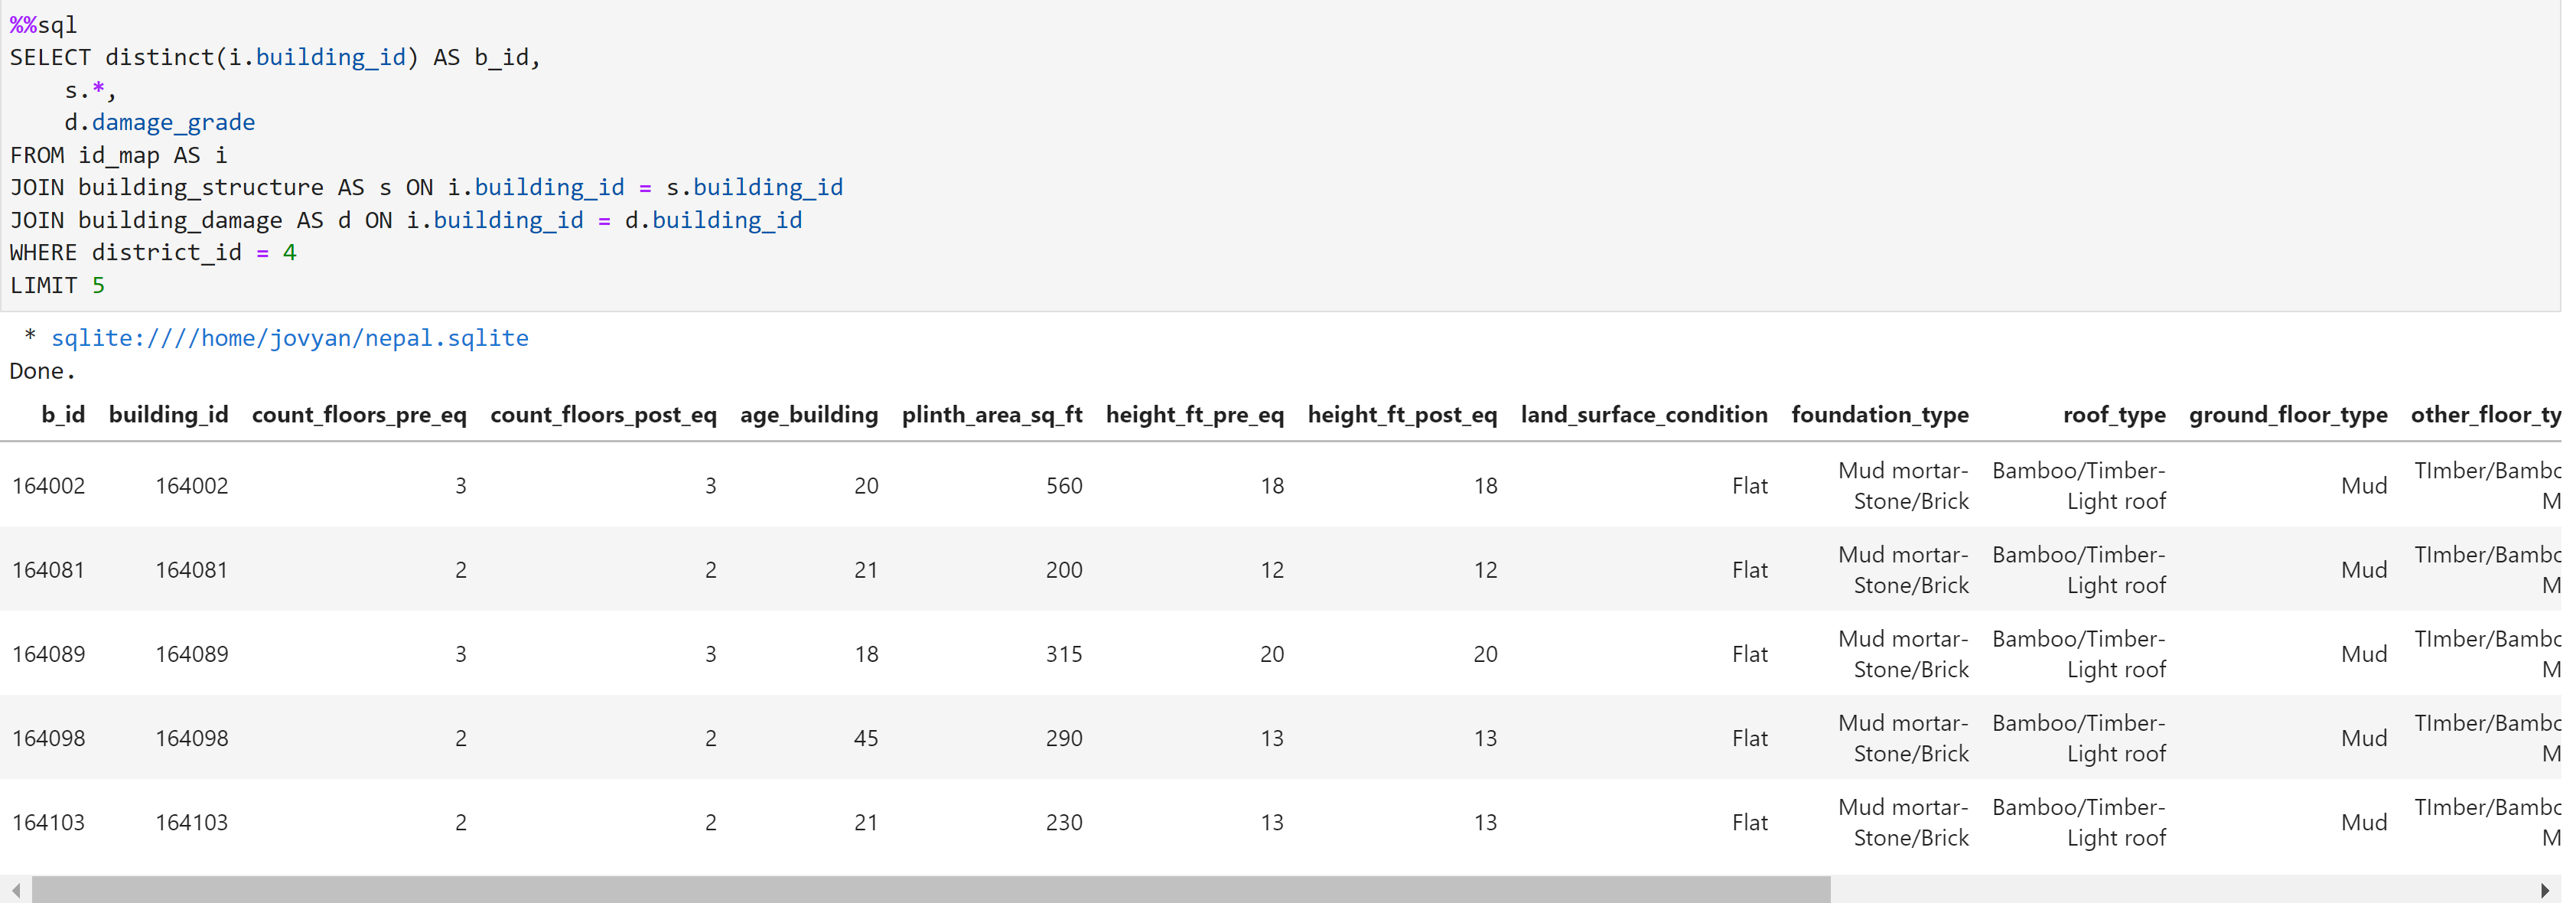

## 1.2 Importing Data
### Connecting to Database with Sqlite3
* Using the `connect` method from the sqlite3 library to connect to the database to manipulate it further using pandas
* 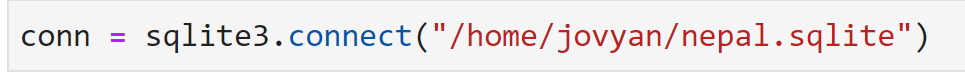

### Creating Docstring
* Taking SQL query, turning it into string which will be passed through a Python function
* The string has three sets of inverted commas `'''...'''`
    * Having three inverted comma allows creation of multi-line string in Python
* 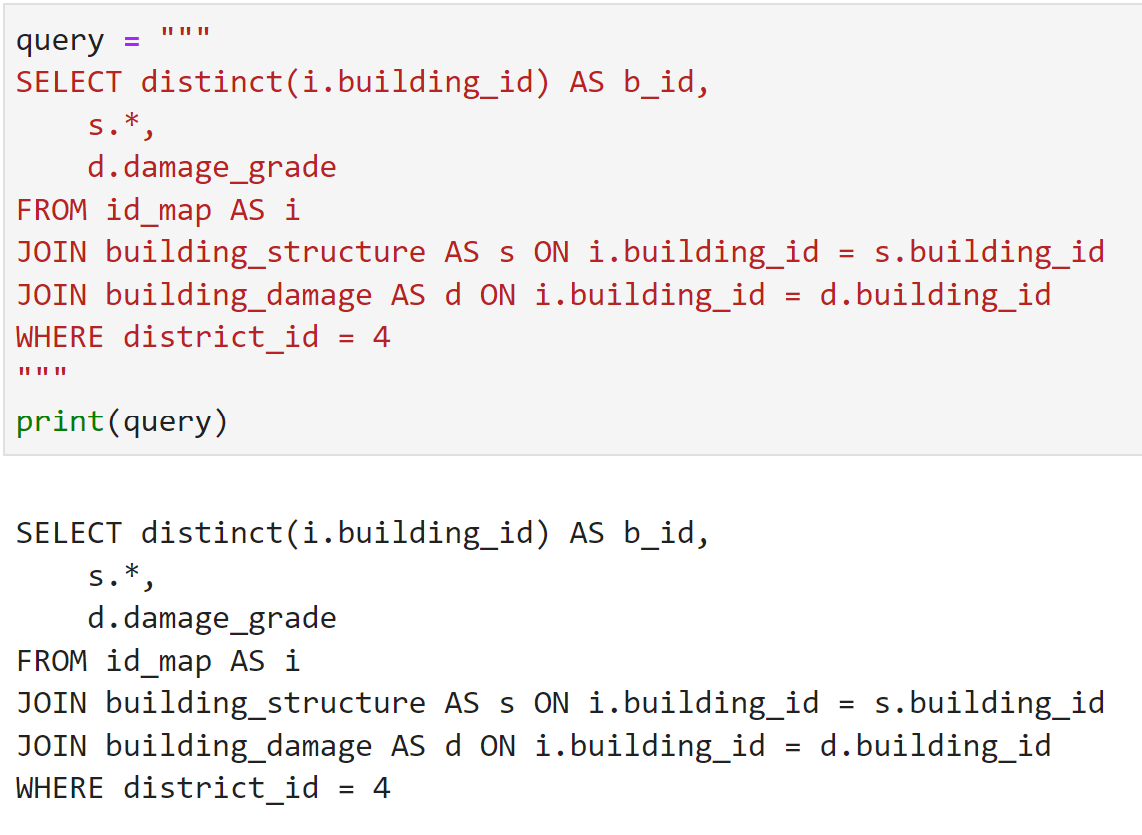

### Reading SQL With Pandas
* Using `read_sql` from pandas library to create a DataFrame from `query`. Setting **`building_id`** is as index column
* A table may have two columns with the same name. In such cases it makes sense to add an alias to one of the columns
* 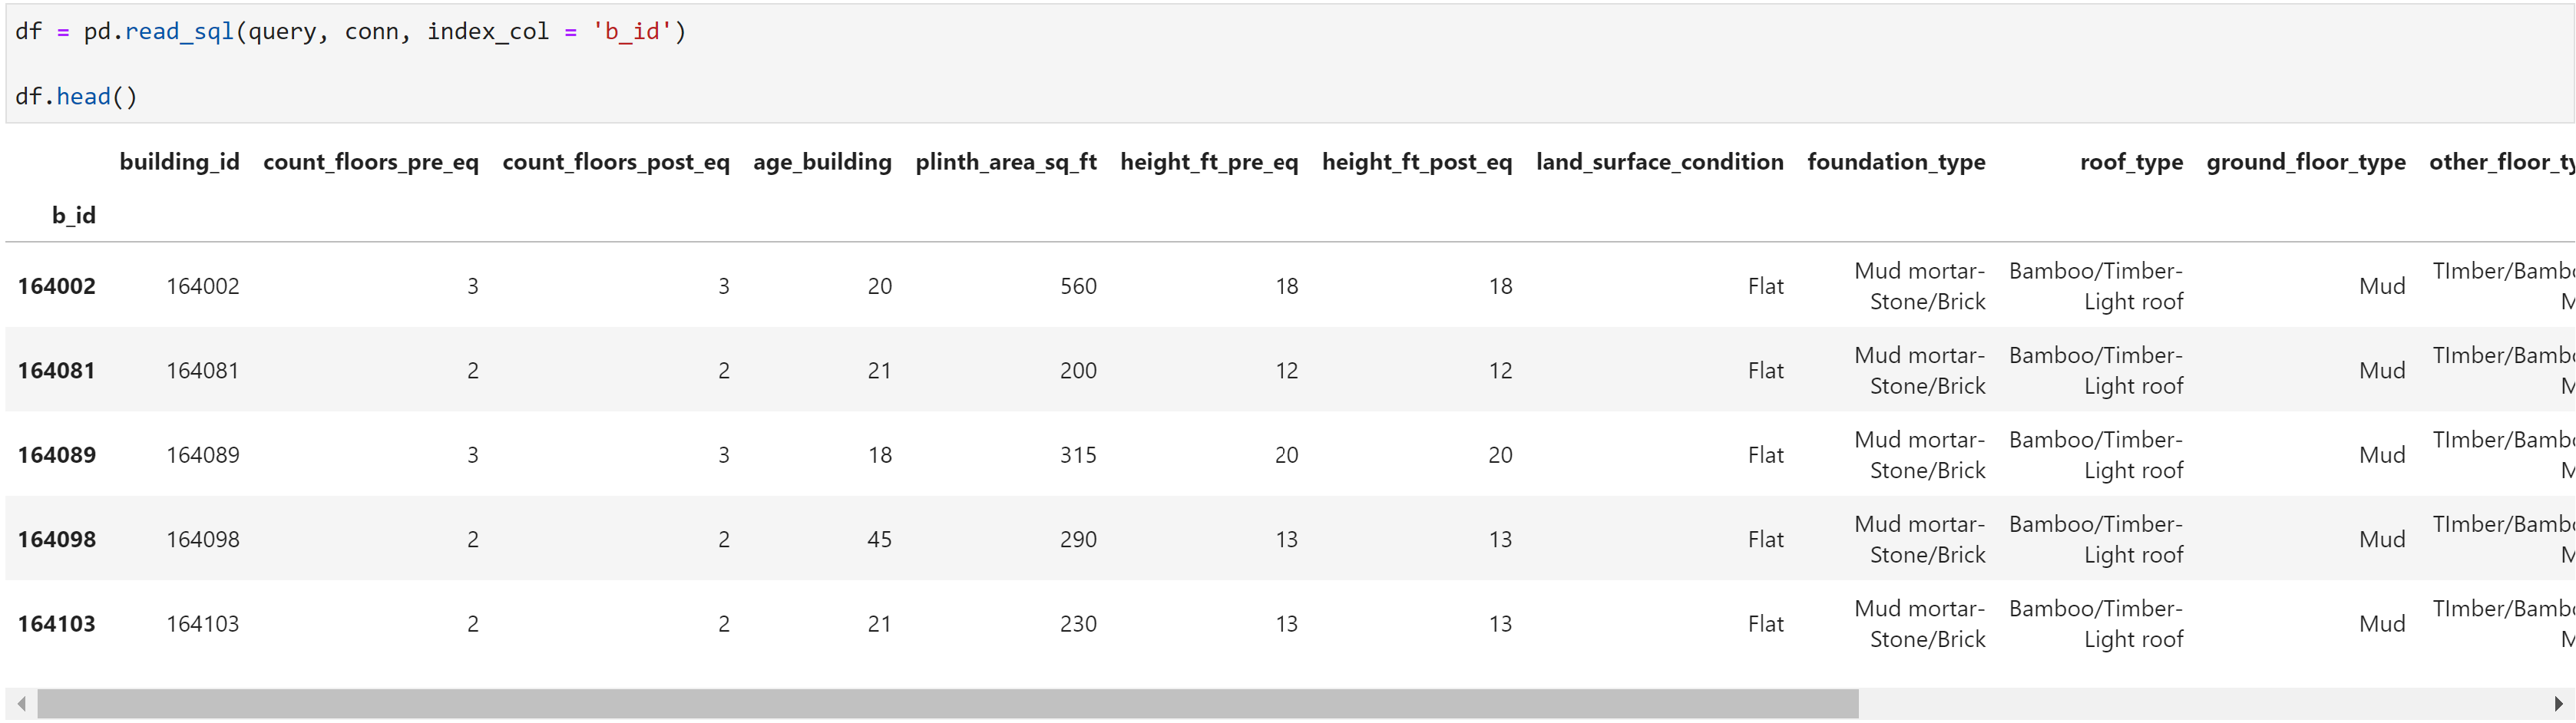